In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow

In [3]:
data = pd.read_csv(r'C:\Users\thuyd\Desktop\bootcamp\Project 4\DNEdited_weekly_rigs_and_oil_price.csv')

d_time = data['Date'] #time
d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
d_price_Brent = data['Brent_Oil_Price']

data.set_index('Date',inplace = True)

train = data.iloc[30:,[0,2]]
test = data.iloc[0:30,[0,2]]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.set_index('WTI_Oil_Price',inplace = True)
test.set_index('WTI_Oil_Price',inplace = True)

In [4]:
#data.head()
#train.head()
test.shape

(30, 1)

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

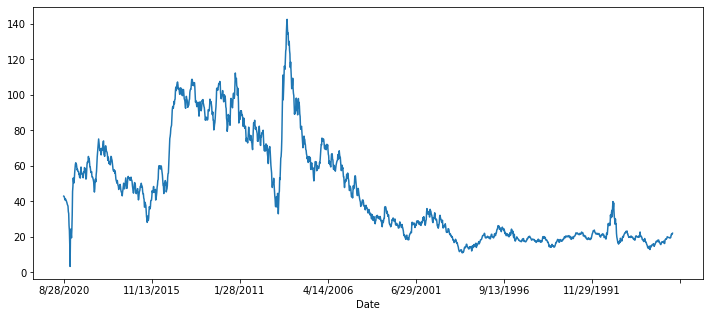

In [5]:
data['WTI_Oil_Price'].plot(figsize=(12,5))

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

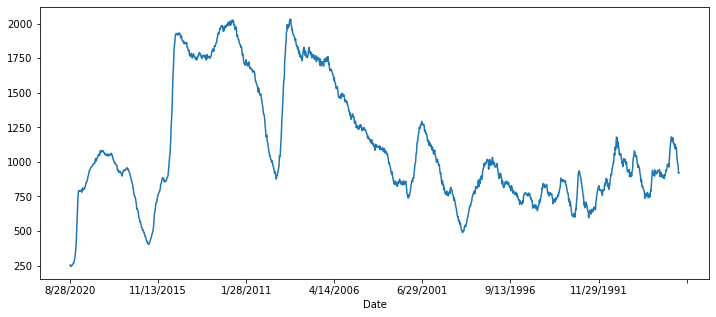

In [6]:
data['Rigs_Count'].plot(figsize=(12,5))

In [7]:
#Axes3D.scatter(d_price_WTI, d_rigs, zs=0, zdir='z', s=20, c=None, depthshade=True)

# d_time = data['Date'] #time
# d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
# d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
# d_price_Brent

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#this is a must
scaler.fit(train)#scaler only takes dataframe intead of series

MinMaxScaler()

In [9]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

<AxesSubplot:xlabel='WTI_Oil_Price'>

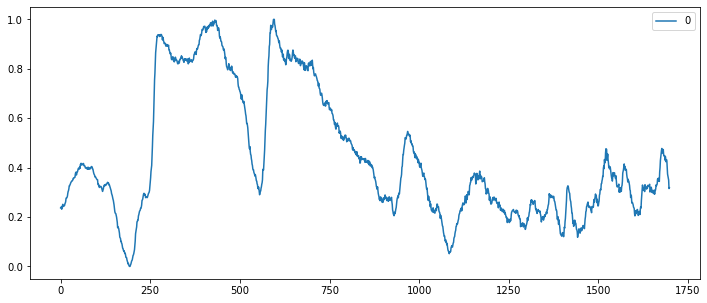

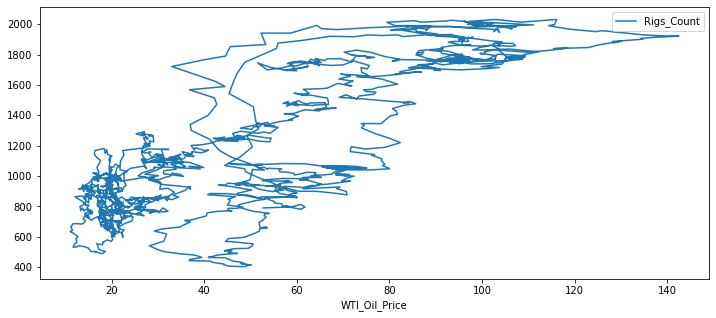

In [10]:
df_scaled_train = pd.DataFrame(scaled_train)
df_scaled_train.plot(figsize=(12,5))
train.plot(figsize=(12,5))

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator #what is this

In [12]:
# define generator, equally spaced data rows
n_input = 20
n_features = 1
#batch size too large will overfit
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23724647 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589
 0.25138291 0.24277812 0.24277812 0.244622   0.24523663 0.24708052
 0.25384143 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973
 0.28027044 0.28518746]
Predict this y: 
 [[0.29625077]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [15]:
n_input = 30
n_features = 1
#batch size too large will overfit
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 30, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               1

In [18]:
model.fit_generator(train_generator,epochs=500)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
1669/1669 [==============================] - 42s 25ms/step - loss: 0.0105
Epoch 2/500
1669/1669 [==============================] - 44s 26ms/step - loss: 0.0039
Epoch 3/500
1669/1669 [==============================] - 44s 26ms/step - loss: 0.0030
Epoch 4/500
1669/1669 [==============================] - 48s 29ms/step - loss: 0.0030
Epoch 5/500
1669/1669 [==============================] - 48s 29ms/step - loss: 0.0026
Epoch 6/500
1669/1669 [==============================] - 51s 31ms/step - loss: 0.0024
Epoch 7/500
1669/1669 [==============================] - 50s 30ms/step - loss: 0.0021
Epoch 8/500
1669/1669 [==============================] - 53s 32ms/step - loss: 0.0023
Epoch 9/500
1669/1669 [==============================] - 51s 30ms/step - loss: 0.0021
Epoch 10/500
1669/1669 [==============================] - 55s 33ms/step - loss: 0.0018
Epoch 11/500
1669/1669 [==============================] - 56s 3

1669/1669 [==============================] - 73s 44ms/step - loss: 6.1706e-04
Epoch 90/500
1669/1669 [==============================] - 75s 45ms/step - loss: 5.3214e-04
Epoch 91/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.4361e-04
Epoch 92/500
1669/1669 [==============================] - 73s 44ms/step - loss: 5.6640e-04
Epoch 93/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.1336e-04
Epoch 94/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.4481e-04 1s - lo
Epoch 95/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.7739e-04
Epoch 96/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.1742e-04
Epoch 97/500
1669/1669 [==============================] - 74s 44ms/step - loss: 4.9936e-04
Epoch 98/500
1669/1669 [==============================] - 73s 44ms/step - loss: 5.6694e-04
Epoch 99/500
1669/1669 [==============================] - 74s 44ms/step - loss: 5.4509e-04
Epoc

1669/1669 [==============================] - 52s 31ms/step - loss: 4.4576e-04
Epoch 176/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.4688e-04 0s - loss:
Epoch 177/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.2323e-04
Epoch 178/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.4796e-04
Epoch 179/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.4389e-04
Epoch 180/500
1669/1669 [==============================] - 53s 31ms/step - loss: 4.2858e-04
Epoch 181/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.2354e-04
Epoch 182/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.1970e-04
Epoch 183/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.2948e-04
Epoch 184/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.3909e-04
Epoch 185/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.

1669/1669 [==============================] - 52s 31ms/step - loss: 4.0138e-04
Epoch 264/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.0978e-04
Epoch 265/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.9694e-04
Epoch 266/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.6543e-04
Epoch 267/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.8375e-04
Epoch 268/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.9766e-04
Epoch 269/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.3568e-04
Epoch 270/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.7717e-04
Epoch 271/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.6871e-04
Epoch 272/500
1669/1669 [==============================] - 52s 31ms/step - loss: 4.0195e-04
Epoch 273/500
1669/1669 [==============================] - 53s 31ms/step - loss: 3.7533e-04
Ep

1669/1669 [==============================] - 53s 32ms/step - loss: 3.5145e-04
Epoch 352/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.5953e-04
Epoch 353/500
1669/1669 [==============================] - 53s 31ms/step - loss: 3.7880e-04
Epoch 354/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.6604e-04
Epoch 355/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.6222e-04
Epoch 356/500
1669/1669 [==============================] - 54s 32ms/step - loss: 3.6490e-04
Epoch 357/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.5287e-04
Epoch 358/500
1669/1669 [==============================] - 53s 31ms/step - loss: 3.8358e-04
Epoch 359/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.4211e-04
Epoch 360/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.5096e-04
Epoch 361/500
1669/1669 [==============================] - 52s 31ms/step - loss: 3.5840e-04
Ep

1669/1669 [==============================] - 105s 63ms/step - loss: 3.5021e-04
Epoch 440/500
1669/1669 [==============================] - 101s 60ms/step - loss: 3.3805e-04
Epoch 441/500
1669/1669 [==============================] - 102s 61ms/step - loss: 3.4800e-04
Epoch 442/500
1669/1669 [==============================] - 103s 61ms/step - loss: 3.5965e-04
Epoch 443/500
1669/1669 [==============================] - 102s 61ms/step - loss: 3.3874e-041
Epoch 444/500
1669/1669 [==============================] - 104s 62ms/step - loss: 3.5096e-04
Epoch 445/500
1669/1669 [==============================] - 103s 61ms/step - loss: 3.2510e-042s - loss:
Epoch 446/500
1669/1669 [==============================] - 103s 62ms/step - loss: 3.3506e-04
Epoch 447/500
1669/1669 [==============================] - 103s 62ms/step - loss: 3.5033e-04
Epoch 448/500
1669/1669 [==============================] - 103s 61ms/step - loss: 3.5759e-04
Epoch 449/500
1669/1669 [==============================] - 76s 45ms/step 

In [19]:
model.history.history.keys()

dict_keys(['loss'])

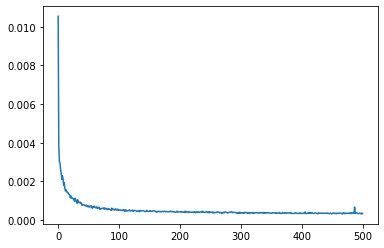

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

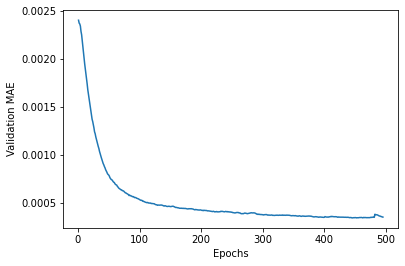

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(loss_per_epoch[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
# 10 history steps --> step 13
# last 10 points in train --> pt 1 in test data
first_eval_batch = scaled_train[-n_input:]

In [23]:
first_eval_batch

array([[0.35771358],
       [0.34419176],
       [0.38229871],
       [0.3995083 ],
       [0.42901045],
       [0.44068838],
       [0.45543946],
       [0.46957591],
       [0.47756607],
       [0.45974186],
       [0.46527351],
       [0.45974186],
       [0.47326368],
       [0.45298095],
       [0.44683467],
       [0.44622004],
       [0.44867855],
       [0.4302397 ],
       [0.44437615],
       [0.42409342],
       [0.42839582],
       [0.43269822],
       [0.42716656],
       [0.39643516],
       [0.37369392],
       [0.36508912],
       [0.3558697 ],
       [0.34972342],
       [0.31530424],
       [0.31837738]])

In [24]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional

In [25]:
model.predict(first_eval_batch)

array([[0.28637224]], dtype=float32)

In [26]:
scaled_test[0]

array([-0.09219422])

In [27]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wants(same format as TimeSeries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#how far into the future will I forecast?
#len(test) -->I can also change to 24

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [28]:
test_predictions

[array([0.28637224], dtype=float32),
 array([0.2667066], dtype=float32),
 array([0.24156675], dtype=float32),
 array([0.2153898], dtype=float32),
 array([0.18996155], dtype=float32),
 array([0.16674554], dtype=float32),
 array([0.14650959], dtype=float32),
 array([0.12925783], dtype=float32),
 array([0.11460832], dtype=float32),
 array([0.10230702], dtype=float32),
 array([0.09217003], dtype=float32),
 array([0.08396229], dtype=float32),
 array([0.07766107], dtype=float32),
 array([0.07295942], dtype=float32),
 array([0.06988037], dtype=float32),
 array([0.06815696], dtype=float32),
 array([0.06772366], dtype=float32),
 array([0.06840327], dtype=float32),
 array([0.07036045], dtype=float32),
 array([0.07310274], dtype=float32),
 array([0.07732111], dtype=float32),
 array([0.08186844], dtype=float32),
 array([0.08771959], dtype=float32),
 array([0.09397584], dtype=float32),
 array([0.10130769], dtype=float32),
 array([0.10862622], dtype=float32),
 array([0.11938605], dtype=float32),
 ar

In [29]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647]])

In [30]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
true_predictions

array([[869.92764157],
       [837.93161523],
       [797.02909806],
       [754.43920957],
       [713.06744611],
       [675.29499924],
       [642.37109929],
       [614.30248615],
       [590.46773276],
       [570.45352417],
       [553.96063861],
       [540.60664824],
       [530.35455641],
       [522.70498133],
       [517.69535601],
       [514.89137006],
       [514.18639752],
       [515.29212651],
       [518.4764553 ],
       [522.93816194],
       [529.80144948],
       [537.19995174],
       [546.71977207],
       [556.89869493],
       [568.82761186],
       [580.73485449],
       [598.24109867],
       [612.13714063],
       [629.93266648],
       [657.85901472]])

In [32]:
test['Predictions'] = true_predictions

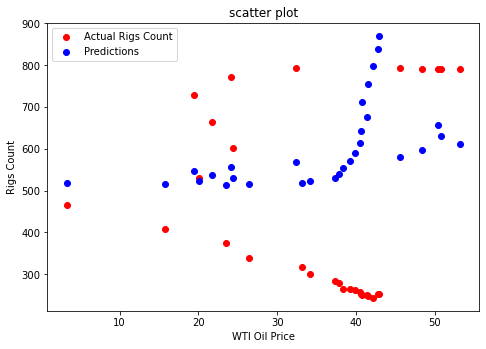

In [33]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
test_2 = test.reset_index()
ax.scatter(test_2['WTI_Oil_Price'], test_2['Rigs_Count'], color='r',label = "Actual Rigs Count")
ax.scatter(test_2['WTI_Oil_Price'], test_2['Predictions'], color='b', label = "Predictions")
ax.set_xlabel('WTI Oil Price')
ax.set_ylabel('Rigs Count')
ax.set_title('scatter plot')
plt.legend()
plt.show()